<a href="https://colab.research.google.com/github/aghniyaaj/UAS-KecerdasanBuatan/blob/main/notebook_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TB KELOMPOK 6


---
- Aghniya Afiatul Jannah (2306034)
- Alya Rahmawati (2306063)


**Import Dataset**


Dataset sendiri sudah ada dalam Drive jadi hanya perlu mounting drive.

In [ ]:
dataset_path = "/content/drive/MyDrive/Prak AI/Dataset/heart.csv"

**Import Library**

---



* pandas & numpy: Digunakan untuk manipulasi dan analisis data, terutama dalam format tabel (DataFrame).
* sklearn (Scikit-learn): Pustaka utama untuk machine learning. Dari sini, diimpor beberapa modul penting:
1. train_test_split: Untuk membagi dataset menjadi data latih dan data uji.
2. StandardScaler: Untuk melakukan standardisasi fitur (data).
3. PCA (Principal Component Analysis): Untuk mereduksi dimensi data.
4. KNeighborsClassifier: Algoritma klasifikasi KNN yang akan digunakan sebagai model.
5. metrics (confusion_matrix, classification_report, dll.): Untuk mengevaluasi performa model.
* matplotlib.pyplot & seaborn: Digunakan untuk membuat visualisasi data seperti grafik dan heatmap agar analisis lebih mudah dipahami.



In [ ]:
## import library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(dataset_path)

# **Exoloratory Data**

* df.shape: Menampilkan jumlah baris dan kolom.
* df.info(): Memberikan ringkasan teknis dataset, seperti jumlah baris (entri), jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null. Dari sini bisa dipastikan tidak ada data yang hilang (missing values).
* df.describe(): Menampilkan statistik deskriptif (seperti rata-rata, standar deviasi, nilai minimum, dan maksimum) untuk kolom-kolom numerik. Ini membantu memahami rentang dan distribusi nilai dari setiap fitur.

In [ ]:
# Dimensi data
print("Jumlah baris dan kolom:", df.shape)

# Tipe data dan ringkasan
print(df.info())

# Statistik deskriptif
df.describe()


Jumlah baris dan kolom: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# melihat isi data teratas
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
# melihat isi data paling bawah
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


**Histogram Usia**
* Menampilkan sebagian besar pasien berusia 50 sampai 60

---


**Gender VS target**
* Menampilkan pasien Laki-laki lebih dominan terkena penyakit jantung dimana target 1 lebih banyak di laki-laki dibandingkan perempuan.

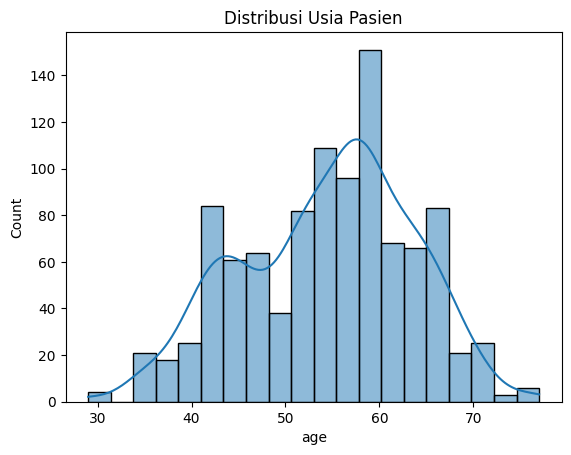

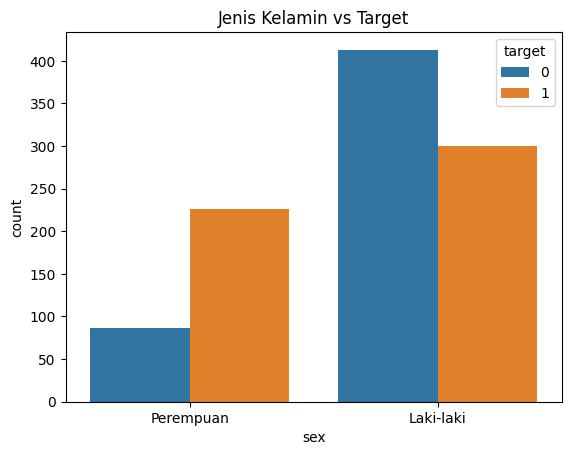

In [ ]:
# Histogram usia
sns.histplot(df['age'], kde=True, bins=20)
plt.title("Distribusi Usia Pasien")
plt.show()

# Gender vs Target
sns.countplot(x='sex', hue='target', data=df)
plt.xticks([0,1], ['Perempuan','Laki-laki'])
plt.title("Jenis Kelamin vs Target")
plt.show()

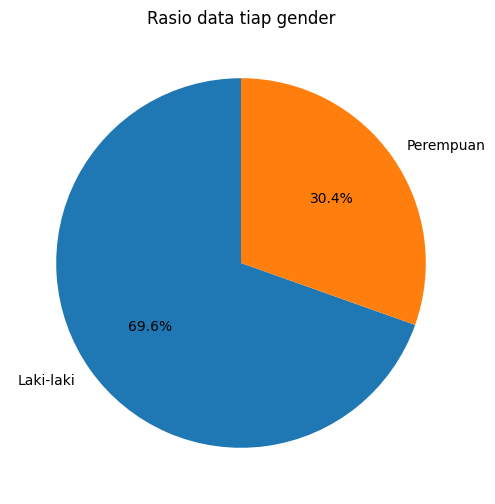

In [ ]:
# melihat rasio data tiap gender
sex = df['sex'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(sex, labels=['Laki-laki', 'Perempuan'], autopct='%1.1f%%', startangle=90)
plt.title('Rasio data tiap gender')
plt.show()

**Analisis Korelasi dan Hubungan Kategori**
Cara Membaca Heatmap:

* Sumbu X dan Y: Keduanya berisi daftar fitur dari dataset.
* Setiap Kotak: Menunjukkan koefisien korelasi antara fitur di sumbu X dan fitur di sumbu Y. Nilainya berkisar dari -1 hingga +1.
1. Nilai mendekati +1 (warna merah tua): Menandakan korelasi positif yang kuat. Jika satu fitur naik, fitur lainnya cenderung ikut naik.
2. Nilai mendekati -1 (warna biru tua): Menandakan korelasi negatif yang kuat. Jika satu fitur naik, fitur lainnya cenderung turun.
3. Nilai mendekati 0 (warna terang): Menandakan korelasi yang sangat lemah atau tidak ada korelasi linear.
* Diagonal Utama: Nilai di diagonal utama selalu 1.00 (merah tua) karena setiap fitur memiliki korelasi sempurna dengan dirinya sendiri.


---


Wawasan Penting dari Heatmap (Terutama Terhadap target):

Tujuan utama dari analisis ini biasanya untuk melihat fitur mana yang paling berpengaruh terhadap variabel target (apakah seseorang menderita penyakit jantung atau tidak). Kita bisa melihatnya di baris atau kolom terakhir (target).

* Fitur dengan Korelasi Positif Terkuat terhadap target:

1. cp (jenis nyeri dada): 0.43. Semakin tinggi tipe cp, semakin tinggi kemungkinan memiliki penyakit jantung.
2. thalach (detak jantung maks): 0.42. Semakin tinggi detak jantung maksimum, semakin tinggi kemungkinan memiliki penyakit jantung.
3. slope (kemiringan segmen ST): 0.35.
* Fitur dengan Korelasi Negatif Terkuat terhadap target:

1. exang (nyeri dada akibat olahraga): -0.44. Ini adalah korelasi terkuat. Artinya, jika exang bernilai 1 (ya), kemungkinan target bernilai 0 (tidak sakit jantung) lebih tinggi.
2. oldpeak: -0.43. Semakin tinggi nilai oldpeak, semakin rendah kemungkinan memiliki penyakit jantung.
3. ca: -0.39. Semakin banyak pembuluh darah yang terdeteksi, semakin rendah kemungkinan memiliki penyakit jantung.

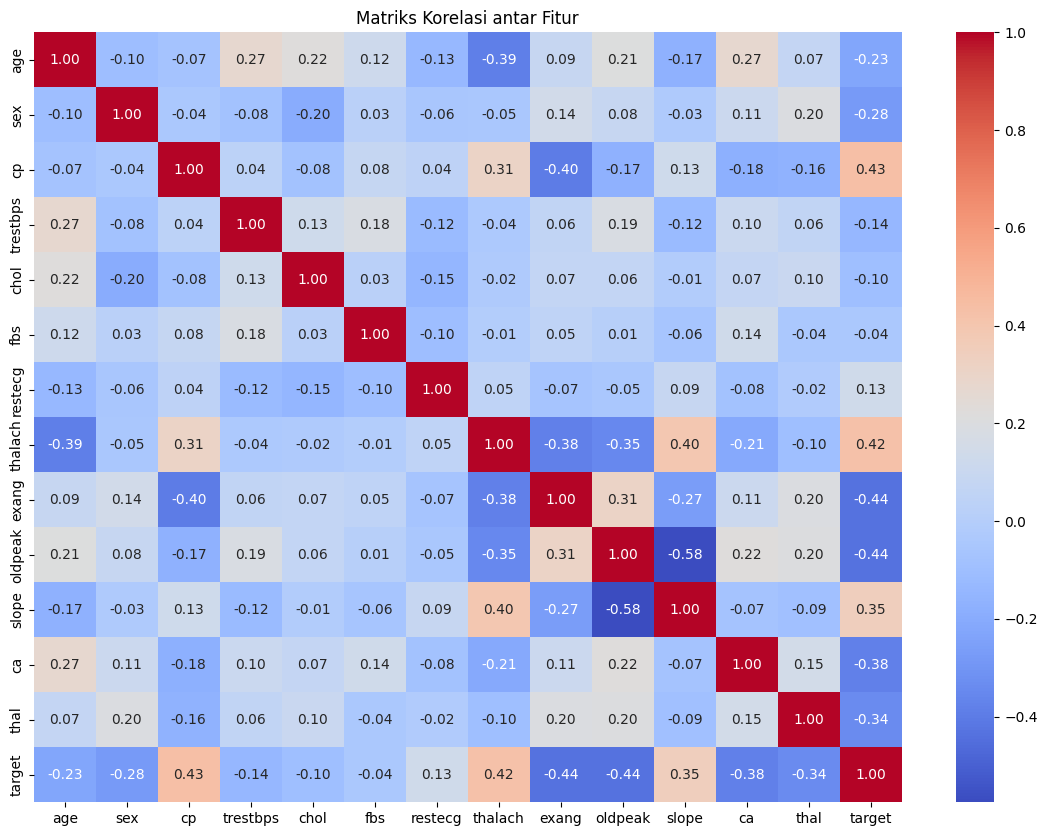

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriks Korelasi antar Fitur")
plt.show()

**Perbandingan Fitur Kategori Terhadap Target**

Analisis bivariat untuk melihat hubungan antara beberapa fitur kategorikal (cp, fbs, exang) dengan variabel target. Fungsi sns.countplot dari library Seaborn membuat diagram batang yang menghitung jumlah kemunculan setiap kategori.

Penggunaan hue='target' adalah kunci utamanya. Parameter ini memisahkan setiap batang berdasarkan nilai target (0 untuk tidak sakit jantung, 1 untuk sakit jantung), sehingga kita bisa langsung membandingkan distribusi penderita dan non-penderita penyakit jantung di setiap kategori fitur.

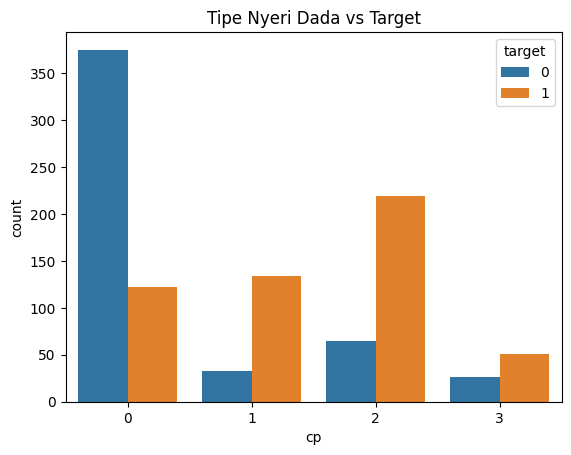

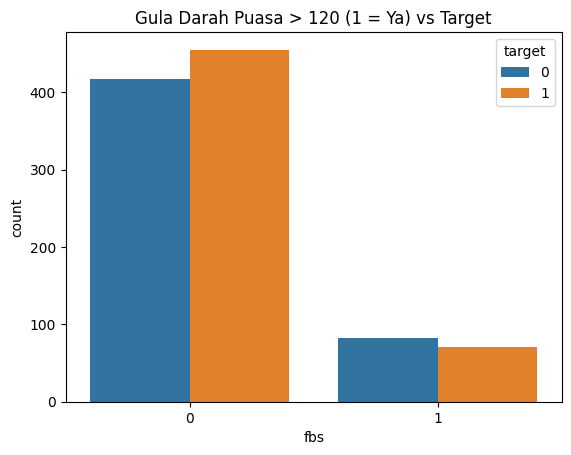

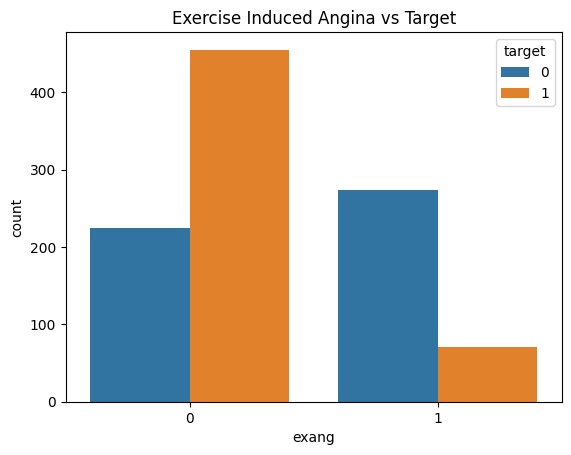

In [ ]:
# Chest Pain Type (cp) vs Target. Nyeri dada
sns.countplot(x='cp', hue='target', data=df)
plt.title("Tipe Nyeri Dada vs Target")
plt.show()

# Fasting Blood Sugar (fbs) vs Target
sns.countplot(x='fbs', hue='target', data=df)
plt.title("Gula Darah Puasa > 120 (1 = Ya) vs Target")
plt.show()

# Exercise Induced Angina (exang). Nyeri dada akibat olahraga???
sns.countplot(x='exang', hue='target', data=df)
plt.title("Exercise Induced Angina vs Target")
plt.show()

**Deteksi Data Tidak Seimbang**

Distribusi target hampir seimbang yaitu sekitar 51%:49%, maka tidak perlu melakukan penyesuaian kelas.

In [ ]:
# Deteksi data tidak seimbang
df['target'].value_counts(normalize=True)

,proportion
target,
1,0.513171
0,0.486829


Boxplot Fitur Numerik Berdasarkan Target

---
1. Kolestrol (chol) vs Target
* Plot ini akan menghasilkan dua boxplot yang bersebelahan:
Satu boxplot menunjukkan distribusi kadar kolesterol untuk kelompok target=0 (Tidak Sakit Jantung).
Satu boxplot lagi menunjukkan distribusi kadar kolesterol untuk kelompok target=1 (Sakit Jantung).
2. Detak jantung maksimal (thalac) vs Target
* Sama seperti sebelumnya, plot ini akan menampilkan dua boxplot untuk membandingkan distribusi detak jantung maksimal (thalach) antara kelompok target=0 dan target=1.
3. Tekanan darah saat istirahat (trestbps) vs Target
*  Plot ini membandingkan distribusi tekanan darah saat istirahat (trestbps) antara kelompok target=0 dan target=1.


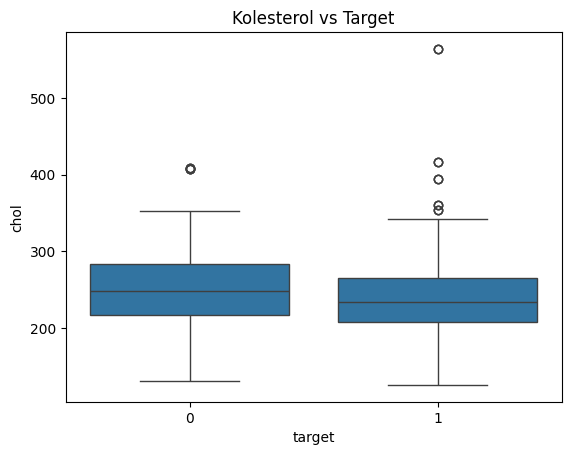

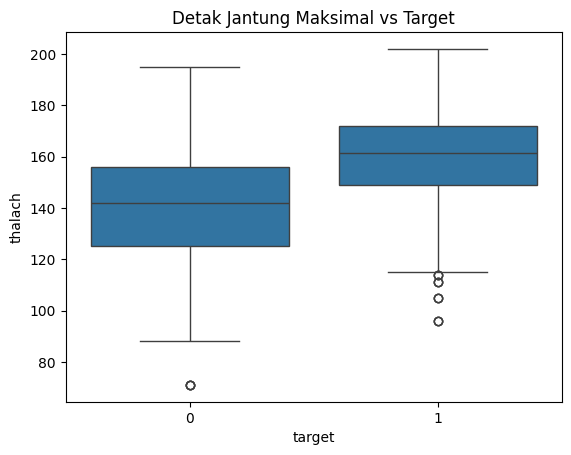

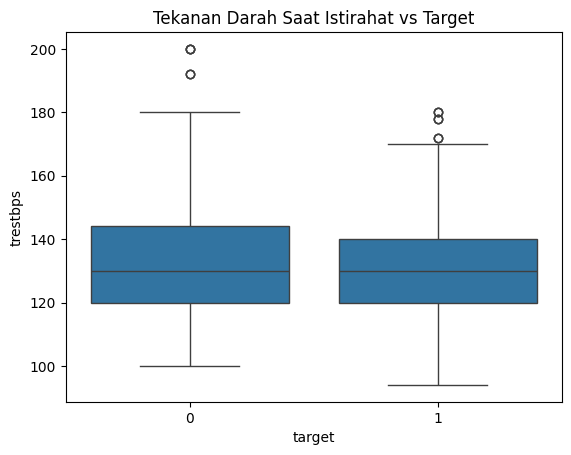

In [ ]:
# Cholesterol vs Target
sns.boxplot(x='target', y='chol', data=df)
plt.title("Kolesterol vs Target")
plt.show()

# Max Heart Rate vs Target
sns.boxplot(x='target', y='thalach', data=df)
plt.title("Detak Jantung Maksimal vs Target")
plt.show()

# Resting Blood Pressure vs Target
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Tekanan Darah Saat Istirahat vs Target")
plt.show()

**Insight Awal**



*   Mayoritas pasien dengan penyakit jantung adalah pria berusia sekitar 50 sampai 60
*   Pasien yang memiliki nilai cp dan thalach tinggi cenderung memiliki penyakit janttung.
* Fitur chol, thalach, dan trestbps memiliki outlier.



# Data Preparation

---



**Deteksi Outlier pada Kolom chol (Kolestrol)**
Kode ini mengimplementasikan metode statistik umum untuk mendeteksi outlier, yaitu Metode IQR (Interquartile Range).

* Q1 = df['chol'].quantile(0.25): Menghitung Kuartil Pertama (persentil ke-25) dari data kolesterol.
* Q3 = df['chol'].quantile(0.75): Menghitung Kuartil Ketiga (persentil ke-75).
* IQR = Q3 - Q1: Menghitung Jangkauan Interkuartil, yaitu rentang antara Q3 dan Q1 yang mencakup 50% data di tengah.
* lower_bound dan upper_bound: Menghitung batas bawah dan batas atas. Secara statistik, setiap titik data yang berada di luar rentang ini dianggap sebagai outlier.
* outliers = df[...]: Baris ini memfilter DataFrame df dan menyimpan semua baris di mana nilai chol lebih kecil dari lower_bound ATAU (|) lebih besar dari upper_bound.
* len(outliers): Menghitung jumlah baris dalam DataFrame outliers yang baru dibuat, yang merupakan jumlah total outlier.

Output menghasilkan: berdasarkan metode IQR, terdapat 16 data pada kolom 'chol' yang nilainya dianggap ekstrem atau pencilan (outlier) dibandingkan dengan sebaran data lainnya.

In [ ]:
# Contoh untuk satu kolom: 'chol'
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = df[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)]
print(f"Jumlah outlier pada 'chol': {len(outliers)}")

Jumlah outlier pada 'chol': 16


**Encoding data kategorik (label encoding, one-hot)**

Dataset yang digunakan tidak memerlukan Encoding karena semua fitur pada dataset yang digunakan adalah numerik (baik hasil pengukuran maupun kategori numerik). Karena itu, tidak perlu One-Hot Encoding atau Label Encoding. Jika dataset mengandung kolom bertipe string/kategori (seperti 'thal' atau 'cp' dalam bentuk teks), maka encoding perlu dilakukan. Tapi dalam dataset ini, semua sudah berupa angka (0, 1, 2, 3).

**Capping / Winsorizing**

Digunakan untuk mengatasi outlier dengan mengganti outlier dengan batas atas/Bawah IQR

In [ ]:
# Capping/Winsorizing
df['chol'] = np.where(df['chol'] > upper_bound, upper_bound,
               np.where(df['chol'] < lower_bound, lower_bound, df['chol']))

**Cek Duplikasi**
* df.duplicated(): Fungsi ini akan memeriksa setiap baris dalam DataFrame df dan menandainya sebagai True jika baris tersebut merupakan salinan persis dari baris yang sudah ada sebelumnya. Jika tidak, akan ditandai False.
* .sum(): Ketika metode .sum() diterapkan pada hasil boolean (True/False), ia akan menghitung semua nilai True (karena True dianggap bernilai 1 dan False bernilai 0). Jadi, df.duplicated().sum() secara efektif menghitung jumlah total baris yang terduplikasi.

Output ini menunjukkan bahwa terdapat 723 baris data duplikat di dalam dataset Anda. Ini adalah temuan yang sangat signifikan. Dataset asli heart.csv dari repositori UCI hanya memiliki 303 data unik. Dataset yang lebih besar yang sering digunakan di Kaggle memiliki 1025 baris, yang tampaknya merupakan gabungan dari beberapa dataset dan mengandung banyak duplikasi,


In [ ]:
# Cek duplikasi
print("Data duplikat:", df.duplicated().sum())

Data duplikat: 723


Menghapus duplikat

Menghapus sekitar 723 duplikat yang terdapat pada datset. Berdapak pada jumlah data berkurang drastis. Ini adalah efek yang paling jelas. Jumlah baris data Anda akan turun dari 1025 menjadi 302 (1025 - 723 = 302). Angka 302 ini sesuai dengan jumlah data asli dari dataset heart.csv standar yang berasal dari UCI (University of California, Irvine), yang berarti dataset Anda sekarang bersih dari data tiruan.

In [ ]:
# Menghapus duplikat
df.drop_duplicates(inplace=True)

# untuk mengecek duplikasi ssetelah dihapus
print("Data duplikat:", df.duplicated().sum())

Data duplikat: 0


Jumlah baris yang semula berjumlah 1025 kini hanya berjumlah 302. Hal ini merupakan hasil dari penghapusan duplikat.

Penggunaan print("Kolom:", df.columns.tolist()):
* df.columns: Attribute ini mengambil semua nama kolom dari DataFrame.
* .tolist(): Metode ini mengubah daftar nama kolom tersebut menjadi format list Python standar agar mudah dibaca.
Tujuan: Perintah ini digunakan untuk melihat dengan cepat nama-nama dari semua fitur yang tersedia dalam dataset. Ini penting untuk mengetahui variabel apa saja yang bisa kita analisis.

In [ ]:
## Cek struktur data
print("Jumlah baris dan kolom:", df.shape)
print("Kolom:", df.columns.tolist())
print(df.head())

Jumlah baris dan kolom: (302, 14)
Kolom: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
   age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1   0       125  212.0    0        1      168      0      1.0   
1   53    1   0       140  203.0    1        0      155      1      3.1   
2   70    1   0       145  174.0    0        1      125      1      2.6   
3   61    1   0       148  203.0    0        1      161      0      0.0   
4   62    0   0       138  294.0    1        1      106      0      1.9   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  


**Pengecekan Missing Value**

Dataset clear tidak memiliki missinng value.

In [ ]:
# Cek  missing value
print("Missing value:\n", df.isnull().sum())

Missing value:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Normalisasi/Standarisasi data numerik**
1. Pemisahan Fitur dan Target
* X = df.drop('target', axis=1): X menjadi
 DataFrame yang berisi semua fitur (variabel independen).
* y = df['target']: y adalah Series yang berisi variabel target (variabel dependen) yang ingin diprediksi.
2. Normalisasi
* scaler = StandardScaler() dan X_scaled = scaler.fit_transform(X): Semua fitur dalam X diubah skalanya menggunakan standardisasi Z-Score. Ini membuat semua fitur memiliki skala yang sebanding, yang sangat penting untuk algoritma berbasis jarak seperti KNN.

3. Reduksi Dimensi (PCA)
* pca = PCA(n_components=8) dan X_pca = pca.fit_transform(X_scaled): Principal Component Analysis digunakan untuk mereduksi 13 fitur asli menjadi 8 "komponen utama". Komponen ini adalah kombinasi linear dari fitur asli yang menangkap sebagian besar variasi dalam data. Tujuannya adalah untuk menyederhanakan model tanpa kehilangan banyak informasi penting.
4. Pembagian Data Latih dan Uji:

X_train, X_test, y_train, y_test = train_test_split(...): Data yang telah diproses (X_pca dan y) dibagi menjadi dua set:
* Training set (X_train, y_train): 80% dari data, digunakan untuk melatih model KNN.
* Testing set (X_test, y_test): 20% dari data, digunakan untuk menguji seberapa baik model yang telah dilatih dapat memprediksi data baru. random_state=42 memastikan pembagian data selalu sama setiap kali kode dijalankan.

In [ ]:
# Pisahkan fitur dan target
X = df.drop('target', axis=1)
y = df['target']

# Normalisasi (Z-Score)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (reduksi ke 8 komponen utama)
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Modeling


---


**Pelatihan Model**

Model yang digunakan yaitu KNN atau K-Nearest Neighbors
* knn = KNeighborsClassifier(n_neighbors=20): Menginisialisasi model KNN dengan parameter k=20. Artinya, untuk memprediksi kelas sebuah data baru, model akan melihat 20 tetangga terdekatnya.
* knn.fit(X_train, y_train): Melatih model menggunakan data latih. Model "belajar" pola dari X_train dan y_train.


In [36]:
## KNN Training dan Prediction
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation

---
**Evaluasi** menggunakan vonfusion matrix.

Confusion Matrix: confusion_matrix(y_test, y_pred) menghasilkan matriks yang membandingkan nilai aktual (y_test) dengan nilai prediksi (y_pred). Heatmap yang dihasilkan memvisualisasikan:
* True Positives (TP): Pasien sakit jantung yang diprediksi benar. (90)
* True Negatives (TN): Pasien tidak sakit jantung yang diprediksi benar.(76)
* False Positives (FP): Pasien tidak sakit jantung tetapi diprediksi sakit.(26)
* False Negatives (FN): Pasien sakit jantung tetapi diprediksi tidak sakit.(13)


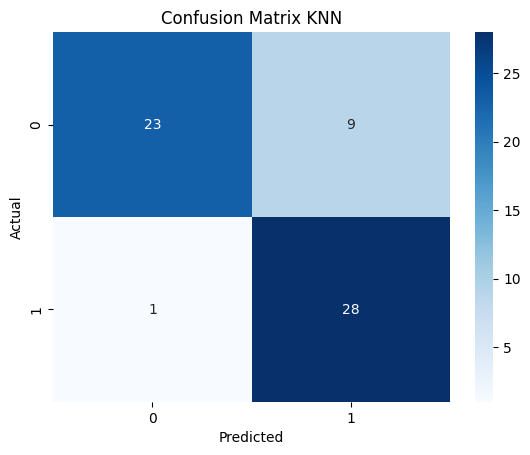

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.72      0.82        32
           1       0.76      0.97      0.85        29

    accuracy                           0.84        61
   macro avg       0.86      0.84      0.83        61
weighted avg       0.86      0.84      0.83        61

Accuracy Score: 0.8360655737704918


In [37]:
# Evaluasi menggunakan confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

**ROC Curve dan AUC Score**
* Kurva ROC (Receiver Operating Characteristic) memvisualisasikan kemampuan model untuk membedakan antara kelas positif dan negatif pada berbagai ambang batas.
* AUC (Area Under the Curve) adalah skor tunggal yang merangkum kinerja ini. Nilai AUC sebesar 0.911 (mendekati 1.0) menunjukkan bahwa model memiliki kemampuan yang sangat baik untuk membedakan antara pasien yang sakit jantung dan yang tidak.

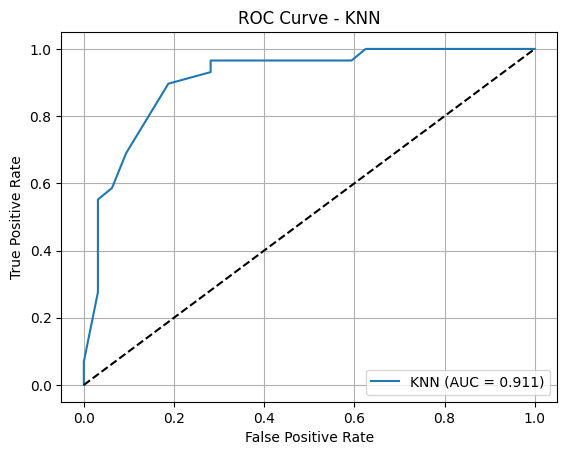

In [38]:
# ROC Curve & AUC

y_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc='lower right')
plt.grid()
plt.show()